# Time Series - 1 Graded assessment

### DATA_SET:

Analytics firm wants to forecast the Price of Mindtree Ltd. stock for the month of Dec 2021. For this, firm has gathered a Closing Stock Price data for the period of Dec 2020 to Nov 2021.

* date ==			date field	
* Closing == 	    Daily Closing Price of Stock (numeric)

#### 1.	Data preparation (5 marks)


a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

b. convert the data into time series (2 MARK)


c. Check for defects in the data such as missing values, null, etc. (1 MARK)

d. Visualize the time series using relevant plots. (1 MARK)


In [2]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [60]:
df=pd.read_csv("data_set.csv")

In [61]:
date = pd.date_range(start='02/04/2019', end='09/30/2020')
df['timestamp']=date
df.set_index('timestamp',inplace=True)
df.head()

,Date,Avg spending
timestamp,,
2019-02-04,04-02-2019,62.58
2019-02-05,05-02-2019,64.27
2019-02-06,06-02-2019,63.44
2019-02-07,07-02-2019,61.50
2019-02-08,08-02-2019,61.16


In [62]:
df.head()

,Date,Avg spending
timestamp,,
2019-02-04,04-02-2019,62.58
2019-02-05,05-02-2019,64.27
2019-02-06,06-02-2019,63.44
2019-02-07,07-02-2019,61.50
2019-02-08,08-02-2019,61.16


In [63]:
df.tail()

,Date,Avg spending
timestamp,,
2020-09-26,26-09-2020,623.71
2020-09-27,27-09-2020,656.57
2020-09-28,28-09-2020,679.82
2020-09-29,29-09-2020,671.87
2020-09-30,30-09-2020,688.72


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 605 entries, 2019-02-04 to 2020-09-30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          605 non-null    object 
 1   Avg spending  605 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.2+ KB


In [65]:
import datetime

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 605 entries, 2019-02-04 to 2020-09-30
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          605 non-null    object        
 1   Avg spending  605 non-null    float64       
 2   date          605 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 18.9+ KB


In [68]:
df.drop('Date', axis=1, inplace=True)

In [70]:
df.head()

,Avg spending,date
timestamp,,
2019-02-04,62.58,2019-04-02
2019-02-05,64.27,2019-05-02
2019-02-06,63.44,2019-06-02
2019-02-07,61.50,2019-07-02
2019-02-08,61.16,2019-08-02


In [71]:
df.drop('date', axis=1, inplace=True)

In [72]:
df.isnull().sum()

Avg spending    0
dtype: int64

<AxesSubplot:xlabel='timestamp'>

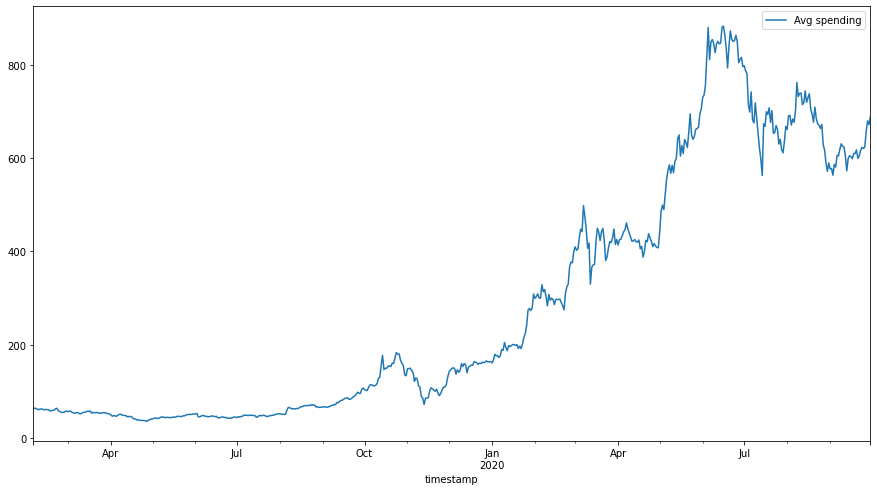

In [73]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot()

#### 2.	Data understanding (15 marks)

a.	Decompose the time series and check for time series components. (4 marks)

b.	Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

c.	Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

d.	Split dataset into train and test sets. Use last two month data for testing. (3 marks)



In [74]:
### a. Decompose the time series and check for time series components. (4 marks)

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
df.head()

,Avg spending
timestamp,
2019-02-04,62.58
2019-02-05,64.27
2019-02-06,63.44
2019-02-07,61.50
2019-02-08,61.16


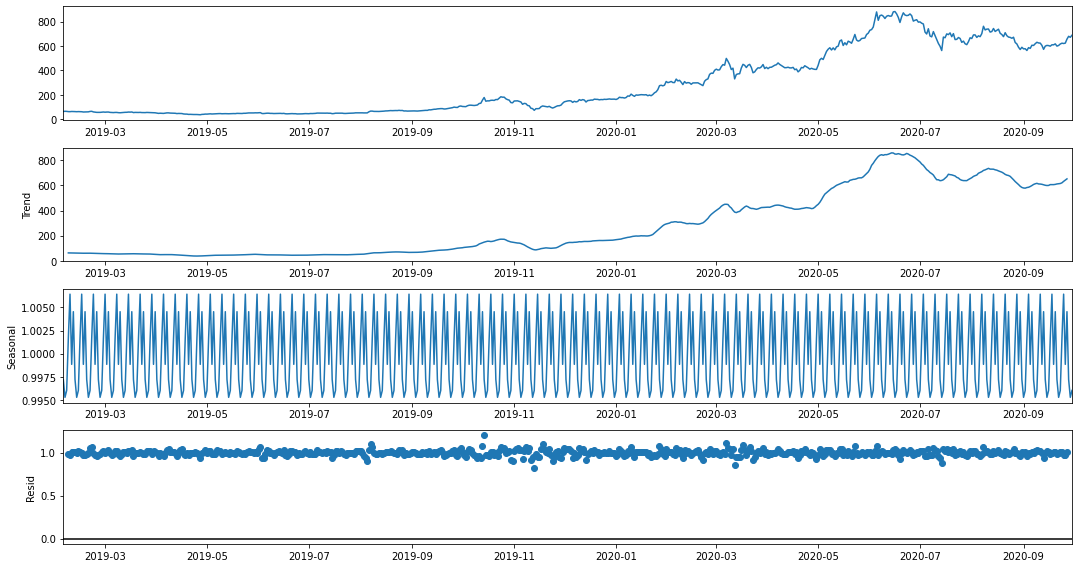

In [85]:
seas_mul=seasonal_decompose(df, model='mul')
seas_mul.plot()
plt.show()

In [86]:
seas_mul.trend

timestamp
2019-02-04           NaN
2019-02-05           NaN
2019-02-06           NaN
2019-02-07     62.554286
2019-02-08     62.418571
                 ...    
2020-09-26    641.815714
2020-09-27    652.118571
2020-09-28           NaN
2020-09-29           NaN
2020-09-30           NaN
Name: trend, Length: 605, dtype: float64

In [87]:
seas_mul.seasonal

timestamp
2019-02-04    0.997207
2019-02-05    0.995287
2019-02-06    0.996032
2019-02-07    1.001660
2019-02-08    1.006429
                ...   
2020-09-26    0.998849
2020-09-27    1.004536
2020-09-28    0.997207
2020-09-29    0.995287
2020-09-30    0.996032
Name: seasonal, Length: 605, dtype: float64

In [12]:
### b. Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

In [88]:
from statsmodels.tsa.stattools            import  adfuller
observations= df.values
test_result = adfuller(observations)
test_result

(-0.30908265623618264,
 0.9242080692970704,
 9,
 595,
 {'1%': -3.441388211993052,
  '5%': -2.8664097967491498,
  '10%': -2.569363480686392},
 4908.380183800914)

In [14]:
####series is non-stationary. applying 1st order differencing

In [89]:
df_diff = df.diff(periods=1).dropna()
observations= df_diff.values
test_result = adfuller(observations)
test_result

(-6.731902702457797,
 3.279870523197202e-09,
 8,
 595,
 {'1%': -3.441388211993052,
  '5%': -2.8664097967491498,
  '10%': -2.569363480686392},
 4899.107905068978)

In [90]:
### c. Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

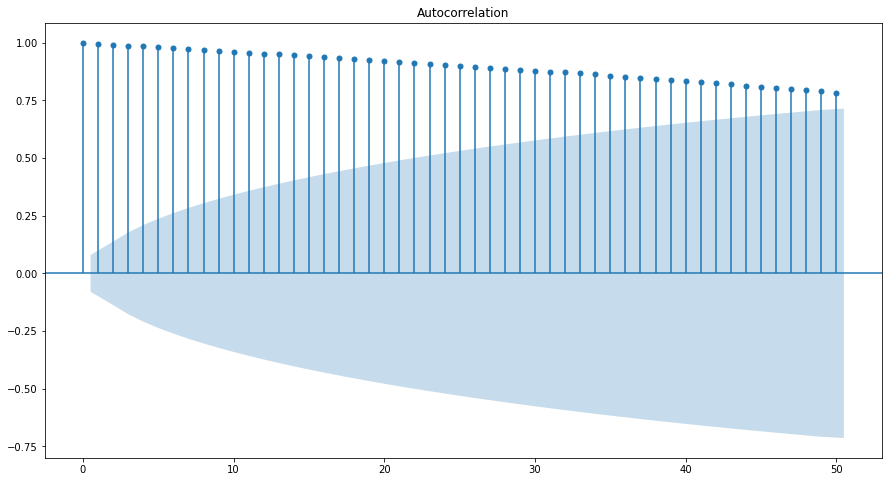

In [94]:
from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf
plot_acf(df,lags=50);

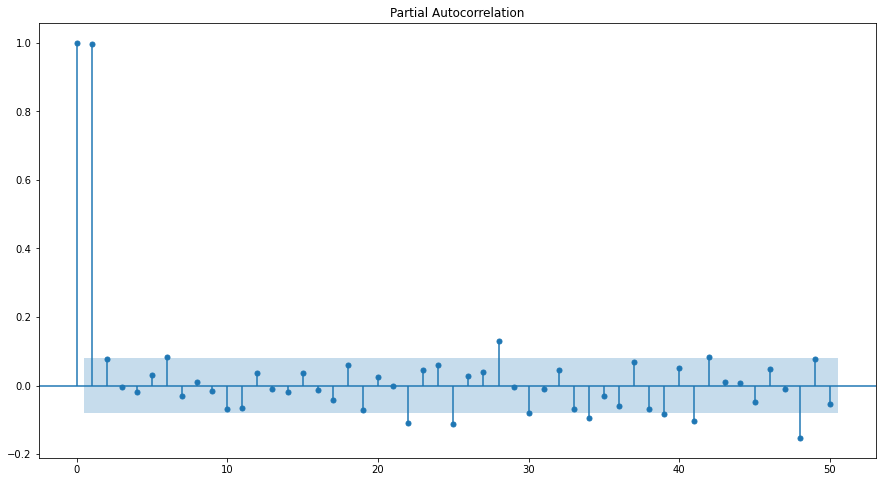

In [95]:
plot_pacf(df,lags=50);

In [93]:
##### Original series is showing AR characteristics as ACF plot is decaying slowly, while PACF is showing limited number of spikes before cut-off.

In [20]:
### d. Split dataset into train and test sets. Use last two month data for testing. (3 marks)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
train, test= train_test_split(df, test_size=0.1, shuffle=False)

In [99]:
train.head()

,Avg spending
timestamp,
2019-02-04,62.58
2019-02-05,64.27
2019-02-06,63.44
2019-02-07,61.50
2019-02-08,61.16


In [100]:
train.tail()

,Avg spending
timestamp,
2020-07-27,640.39
2020-07-28,618.71
2020-07-29,611.29
2020-07-30,635.62
2020-07-31,667.93


In [101]:
test.head()

,Avg spending
timestamp,
2020-08-01,661.75
2020-08-02,691.05
2020-08-03,691.62
2020-08-04,670.97
2020-08-05,683.80


In [102]:
test.tail()

,Avg spending
timestamp,
2020-09-26,623.71
2020-09-27,656.57
2020-09-28,679.82
2020-09-29,671.87
2020-09-30,688.72


In [96]:
train_end=datetime(2020,7,30)
test_end=datetime(2020,9,1)
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

TypeError: 'module' object is not callable

In [103]:
train.shape

(544, 1)

In [104]:
test.shape

(61, 1)


### 3.	Model Building (20 marks)

a.	Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (5 marks)

c.	How would you improve the model? What changes you will make in the base model. Fit the final model.   (10 marks)

d.	Analyze the residuals of final model. Feel free to use charts or graphs to explain. (2 marks) 

e.	Forecast the Close price for next 1 months using the final model? (3 marks)


### Base Model using ARIMA

In [105]:
from statsmodels.tsa.arima_model import  ARIMA
import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [106]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [107]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0) - AIC:7528.666416392138
ARIMA(0, 0, 1) - AIC:6833.0093880700515


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 2) - AIC:6260.184535145538


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 3) - AIC:5902.097654436934
ARIMA(0, 1, 0) - AIC:4519.383478542759
ARIMA(0, 1, 1) - AIC:4518.689274784898
ARIMA(0, 1, 2) - AIC:4520.53424845236


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(0, 1, 3) - AIC:4520.218807261403


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0) - AIC:4538.01067394217


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(1, 1, 0) - AIC:4518.82214362352
ARIMA(1, 1, 1) - AIC:4520.636294389815


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 2) - AIC:4522.309555429481


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 3) - AIC:4522.072983957709


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 0) - AIC:4537.874044354221


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(2, 1, 0) - AIC:4520.274159479382


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 1) - AIC:4521.994414499837


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 1, 3) - AIC:4496.126347633697


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 0, 0) - AIC:4539.517396253377


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

ARIMA(3, 1, 0) - AIC:4520.35747186249


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 1) - AIC:4521.879909433706


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 2) - AIC:4496.1253924536795


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 3) - AIC:4494.695753678148


C:\Users\malli\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [108]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
21,"(3, 1, 3)",4494.695754
20,"(3, 1, 2)",4496.125392
16,"(2, 1, 3)",4496.126348
5,"(0, 1, 1)",4518.689275
9,"(1, 1, 0)",4518.822144
4,"(0, 1, 0)",4519.383479
7,"(0, 1, 3)",4520.218807
14,"(2, 1, 0)",4520.274159
18,"(3, 1, 0)",4520.357472
6,"(0, 1, 2)",4520.534248


In [109]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train, order=(3,1,3))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:           Avg spending   No. Observations:                  544
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2241.157
Date:                Sun, 01 Sep 2024   AIC                           4496.314
Time:                        12:05:44   BIC                           4526.394
Sample:                    02-04-2019   HQIC                          4508.075
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8238      0.024    -34.451      0.000      -0.871      -0.777
ar.L2         -0.7866      0.013    -58.594      0.000      -0.813      -0.760
ar.L3         -0.9482      0.020    -47.489      0.0

C:\Users\malli\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
ARIMA_predictions=results_Arima.forecast(len(test))

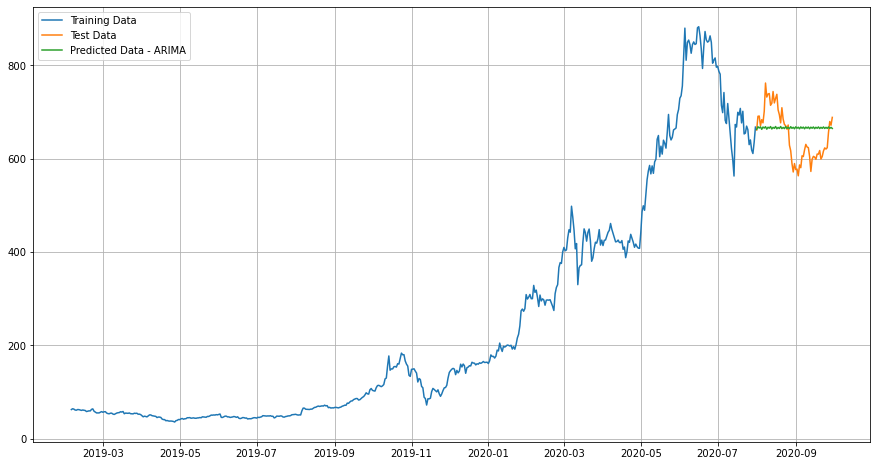

In [111]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [112]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg spending'],ARIMA_predictions, squared=False)
print(rmse)

55.77109139840425


In [122]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

mape=MAPE(test['Avg spending'].values,ARIMA_predictions[0])
print(mape)

7.556558967537567


In [123]:
### Those Model MAPE is less that 10%. Model is not capturing the trend

### Model Improvement

#### Will use Exponential Smoothing model

In [124]:
from statsmodels.tsa.api                  import  ExponentialSmoothing

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Avg spending,No. Observations:,544
Model:,ExponentialSmoothing,SSE,128328.668
Optimized:,True,AIC,2994.090
Trend:,Additive,BIC,3041.378
Seasonal:,Additive,AICC,2994.777
Seasonal Periods:,7,Date:,"Sun, 01 Sep 2024"
Box-Cox:,False,Time:,12:09:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9263471,alpha,True
smoothing_trend,0.0003019,beta,True


In [125]:
TES_predictions =  model_TES.forecast(len(test))

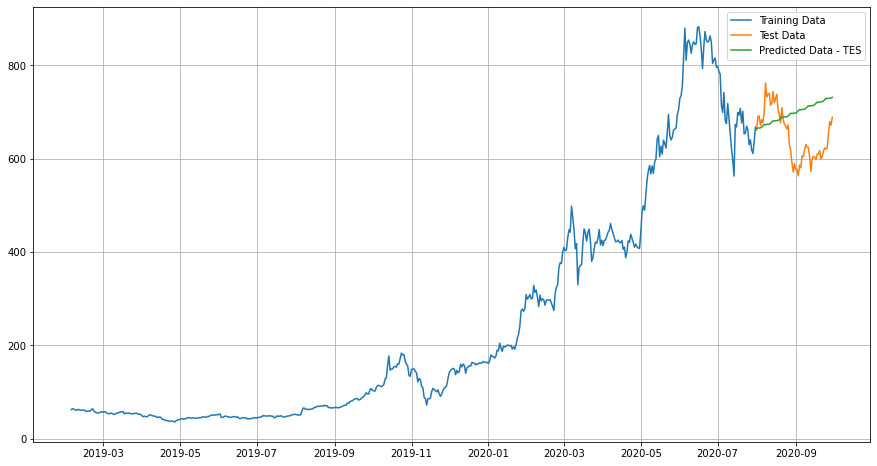

In [126]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [127]:
rmse = mean_squared_error(test['Avg spending'],TES_predictions.values, squared=False)
print(rmse)

83.22313203237533


In [128]:
mape=MAPE(test['Avg spending'].values,TES_predictions.values)
print(mape)

11.554653417365722


#### Model Tuning

In [139]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

C:\Users\malli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Avg spending,No. Observations:,544
Model:,ExponentialSmoothing,SSE,128328.668
Optimized:,True,AIC,2994.090
Trend:,Additive,BIC,3041.378
Seasonal:,Additive,AICC,2994.777
Seasonal Periods:,7,Date:,"Sun, 01 Sep 2024"
Box-Cox:,False,Time:,12:10:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9263471,alpha,True
smoothing_trend,0.0003019,beta,True


In [140]:
TES_predictions =  model_TES.forecast(len(test))

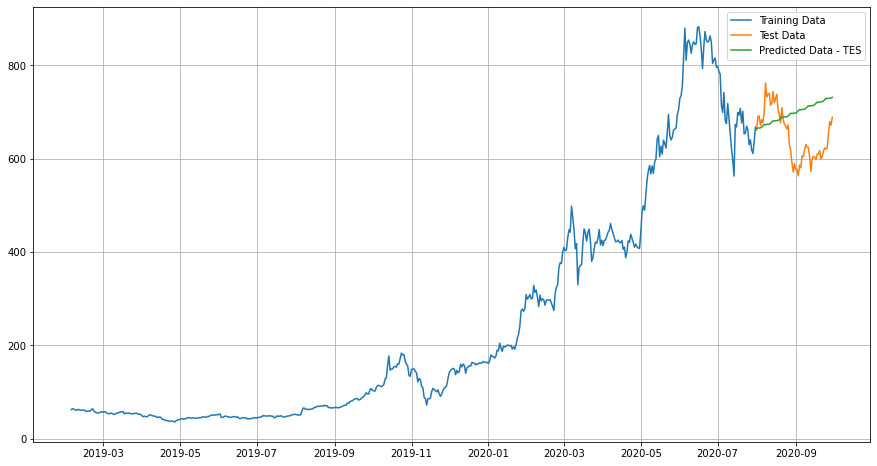

In [141]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [142]:
rmse = mean_squared_error(test['Avg spending'],TES_predictions.values, squared=False)
print(rmse)

83.22313203237533


In [143]:
mape=MAPE(test['Avg spending'].values,TES_predictions.values)
print(mape)

11.554653417365722


### Residual Analysis

In [144]:
residuals = test['Avg spending'].values-TES_predictions.values

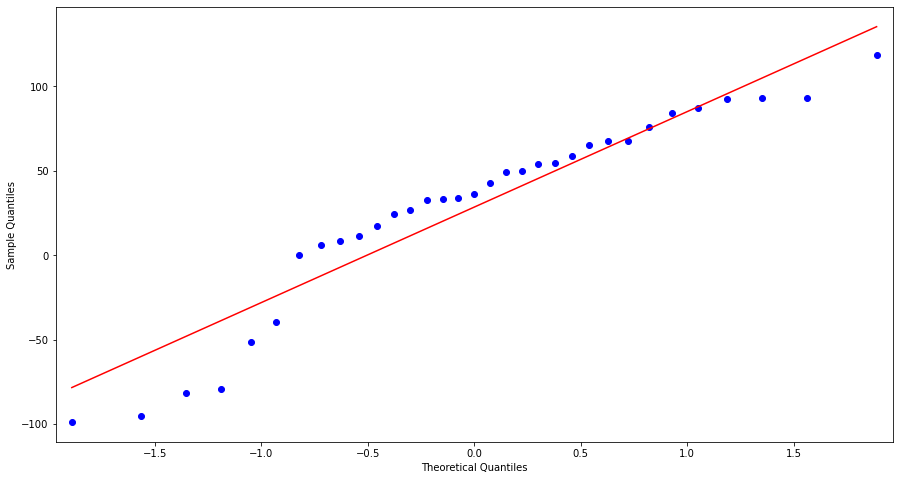

In [45]:
from statsmodels.graphics.gofplots        import  qqplot
qqplot(residuals,line="s");

In [46]:
### residual points are falling approximately along this reference line.

### Forecast Using Final Model

In [47]:
model_TES = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')

C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [48]:
model_TES = model_TES.fit(smoothing_level=0.9542595,smoothing_trend=0.00607340,smoothing_seasonal=0.00158913,optimized=False)
model_TES.summary()

Dep. Variable:,Avg spending,No. Observations:,605
Model:,ExponentialSmoothing,SSE,152977.356
Optimized:,False,AIC,3369.354
Trend:,Additive,BIC,3417.812
Seasonal:,Additive,AICC,3369.970
Seasonal Periods:,7,Date:,"Sat, 03 Sep 2022"
Box-Cox:,False,Time:,13:56:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9542595,alpha,False
smoothing_trend,0.0060734,beta,False


In [49]:
forecast= model_TES.forecast(30)

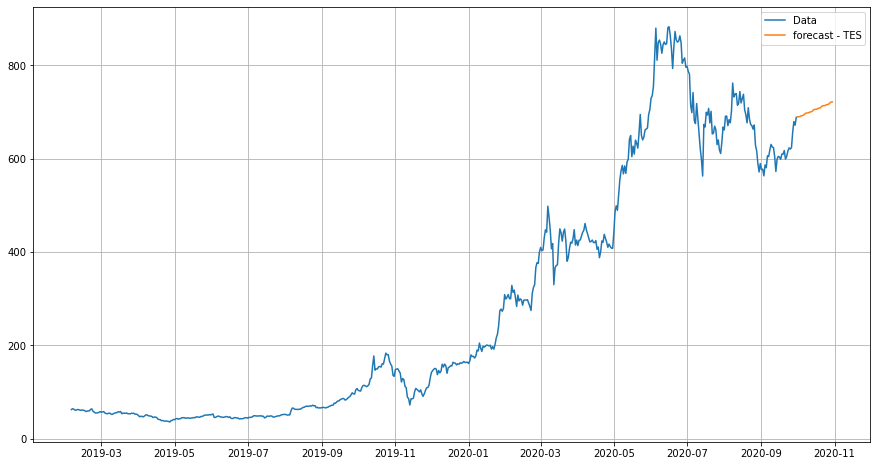

In [50]:
plt.plot(df,label='Data')
plt.plot(forecast,label='forecast - TES')
plt.legend(loc='best')
plt.grid();

#### END